# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

FileNotFoundError: ignored

In [ ]:
dataset

In [ ]:
X = dataset.iloc[:, 3:-1].values # select the features we need
y = dataset.iloc[:, -1].values

In [32]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [33]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [35]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [38]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [39]:
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [13]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [16]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [17]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [18]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 20)

Epoch 1/20
250/250 [==============================] - 7s 3ms/step - loss: 0.5251 - accuracy: 0.7732
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4610 - accuracy: 0.7962
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4411 - accuracy: 0.8015
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4292 - accuracy: 0.8050
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4209 - accuracy: 0.8119
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4143 - accuracy: 0.8158
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4086 - accuracy: 0.8189
Epoch 8/20
250/250 [==============================] - 1s 4ms/step - loss: 0.4038 - accuracy: 0.8199
Epoch 9/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3992 - accuracy: 0.8223
Epoch 10/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8250

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

In [19]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 89ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [40]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1536   59]
 [ 222  183]]


0.8595

## Building an Image Classifier Using the Sequential API
### Using Keras to load the dataset

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `tf.keras.datasets`. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255). Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

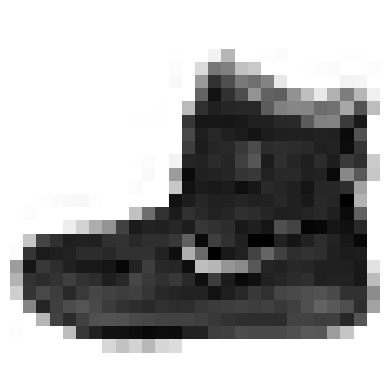

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Ankle boot'

Let's take a look at a sample of the images in the dataset:

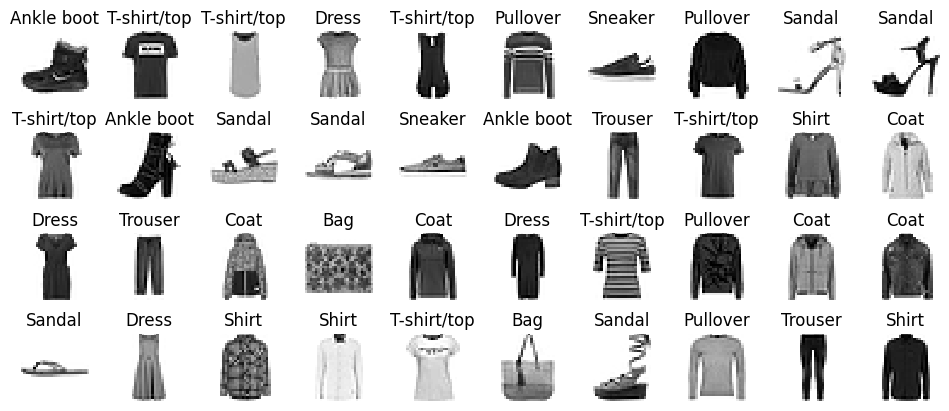

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### Creating the model using the Sequential API

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
# or you can use the following way to create a model
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00502173,  0.06334428,  0.04086335, ...,  0.03756462,
         0.01445294,  0.01309141],
       [ 0.05570889,  0.03287055,  0.05213796, ..., -0.03258862,
         0.07281666,  0.02486309],
       [ 0.06416532,  0.06571394, -0.03963413, ..., -0.066691  ,
         0.03015694, -0.07326968],
       ...,
       [-0.04405301,  0.07064033,  0.07383917, ...,  0.00174977,
        -0.0019844 ,  0.05336851],
       [ 0.0248339 ,  0.07429466, -0.0159735 , ..., -0.01726993,
         0.05818926, -0.05040639],
       [ 0.06920646,  0.01097301, -0.0301231 , ..., -0.01617041,
         0.03535295, -0.06526764]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

### Compiling the model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and evaluating the model

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7140 - accuracy: 0.7673 - val_loss: 0.5025 - val_accuracy: 0.8292
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4846 - accuracy: 0.8316 - val_loss: 0.4596 - val_accuracy: 0.8376
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4383 - accuracy: 0.8471 - val_loss: 0.4218 - val_accuracy: 0.8536
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4146 - accuracy: 0.8552 - val_loss: 0.3928 - val_accuracy: 0.8618
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3940 - accuracy: 0.8621 - val_loss: 0.3898 - val_accuracy: 0.8630
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3777 - accuracy: 0.8677 - val_loss: 0.3940 - val_accuracy: 0.8600
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3651 - accuracy: 0.8713 - val_loss: 0.3702 - val_accuracy:

In [ ]:
history.history

{'loss': [0.7140395045280457,
  0.48464876413345337,
  0.4382530450820923,
  0.41456469893455505,
  0.3940183222293854,
  0.37770968675613403,
  0.3651241064071655,
  0.3539123833179474,
  0.34326452016830444,
  0.3334936499595642],
 'accuracy': [0.7672908902168274,
  0.831636369228363,
  0.8470545411109924,
  0.8551636338233948,
  0.8620908856391907,
  0.8677272796630859,
  0.871290922164917,
  0.8744727373123169,
  0.8793454766273499,
  0.8808727264404297],
 'val_loss': [0.5025144219398499,
  0.45960962772369385,
  0.42179131507873535,
  0.3928338289260864,
  0.38976818323135376,
  0.39404216408729553,
  0.37017515301704407,
  0.3745439052581787,
  0.34942877292633057,
  0.350861519575119],
 'val_accuracy': [0.829200029373169,
  0.8375999927520752,
  0.853600025177002,
  0.8618000149726868,
  0.8629999756813049,
  0.8600000143051147,
  0.8723999857902527,
  0.8614000082015991,
  0.8755999803543091,
  0.8737999796867371]}

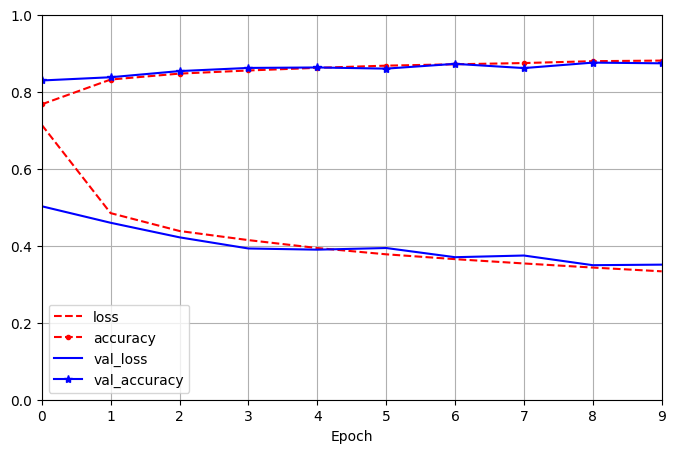

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 9], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])

plt.show()

In [ ]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 2s 7ms/step - loss: 0.3765 - accuracy: 0.8665


[0.37645360827445984, 0.8665000200271606]

### Using the model to make predictions

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 127ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.16, 0.  , 0.76],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

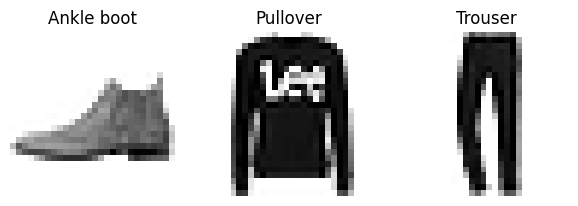

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()